In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# Load Data

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

# check the first few rows
print(df.head())

# check for missing values
print(df.isnull().sum())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

# Visualize Missing Data

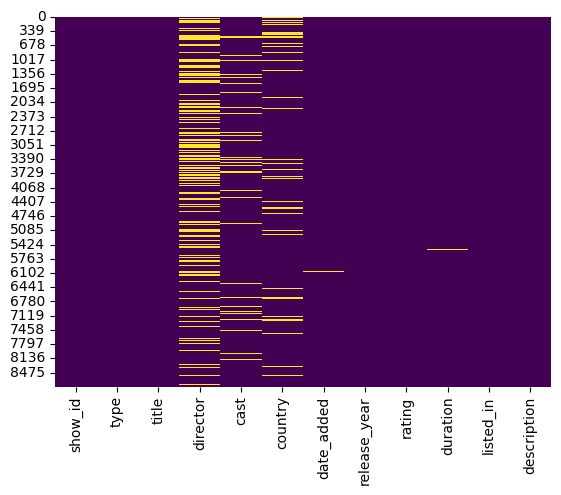

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.savefig('missing_data_visual.png')
plt.show()

# Fill in Missing Values

**Strategy**
* director and country, fill with 'Unknown' (because category column/strings)
* cast, fill with "Not Available"
* date_added, convert to datetime and fill with earliest available date
* rating and duration, fill with most common rating

In [4]:
# Strategy:
# - 'director': fill with 'Unknown'
df['director'] = df['director'].fillna("Unknown")

# - 'cast': fill with 'Not Available'
df['cast'] = df['cast'].fillna("Not Available")

# - 'country': fill with 'Unknown'
df['country'] = df['country'].fillna("Unknown")

# Strip leading/trailing spaces first
df['date_added'] = df['date_added'].str.strip()

# Convert to datetime safely (coerce = turn invalid into NaT)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing dates with earliest valid date
df['date_added'] = df['date_added'].fillna(df['date_added'].min())

# - 'rating': fill with mode (most common rating)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# - 'duration': fill with mode (most common duration)
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

# Verify no missing values left
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


# Dataset Overview

In [5]:
# General info
print(df.info())

# Quick look at data
print(df.head())

# Summary statistics
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB
None
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Joh

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# Content Breakdown

**Movies vs TV Shows**

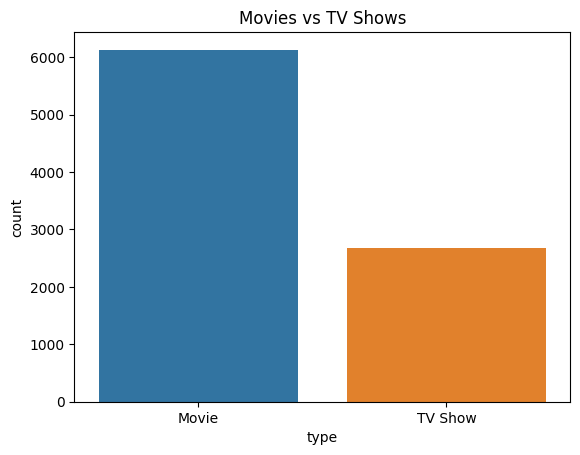

In [6]:
sns.countplot(data=df, x="type")
plt.title("Movies vs TV Shows")
plt.savefig("movies_v_tv.png")
plt.show()

**Top 10 Countries**

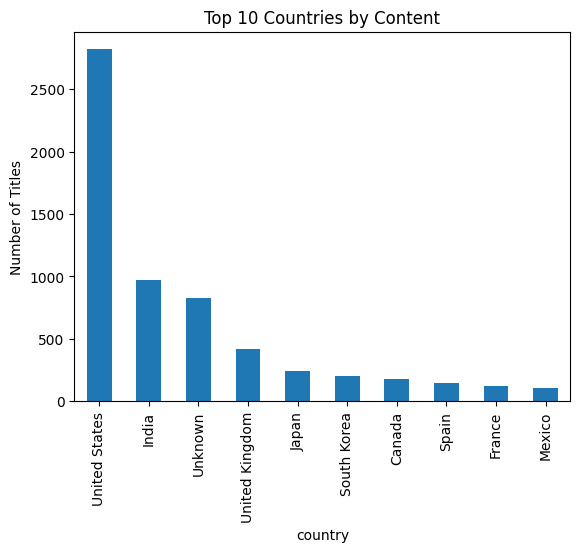

In [7]:
df['country'].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Countries by Content")
plt.ylabel("Number of Titles")
plt.savefig("top_10_countries_by_content.png")
plt.show()

**Most Common Ratings**

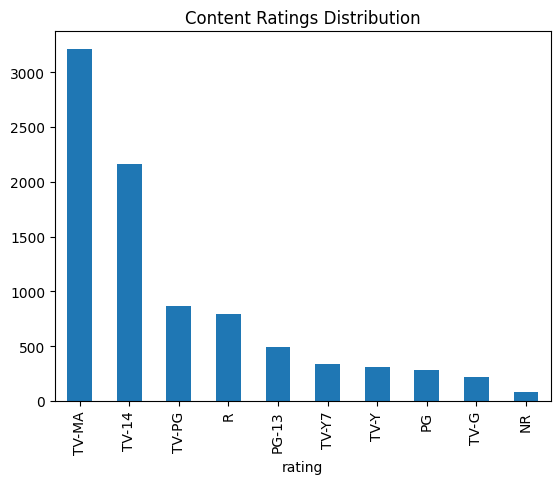

In [8]:
df['rating'].value_counts().head(10).plot(kind="bar")
plt.title("Content Ratings Distribution")
plt.savefig("content_ratings_dist.png")
plt.show()

# Trends over Time

**Releases per year**

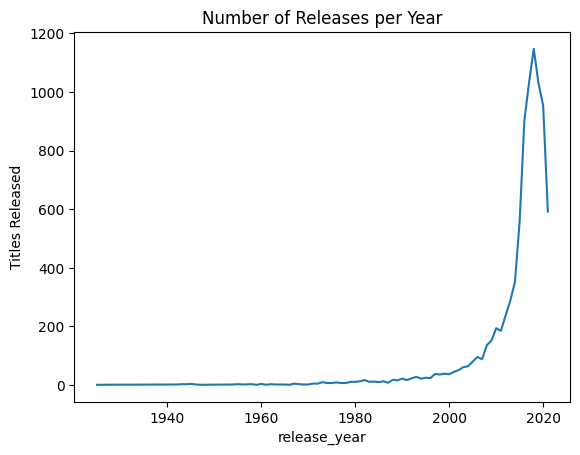

In [9]:
df['release_year'].value_counts().sort_index().plot(kind="line")
plt.title("Number of Releases per Year")
plt.ylabel("Titles Released")
plt.savefig("releases_per_year.png")
plt.show()

**Content added per year to Netflix**

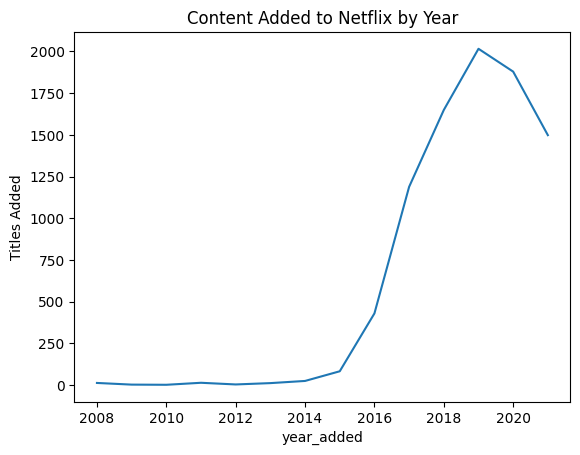

In [10]:
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind="line")
plt.title("Content Added to Netflix by Year")
plt.ylabel("Titles Added")
plt.savefig("content_added_per_year.png")
plt.show()

# Duration Insights

**Movies vs TV Shows**

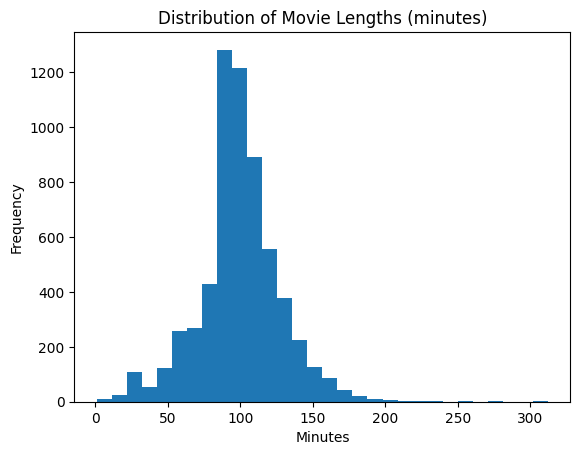

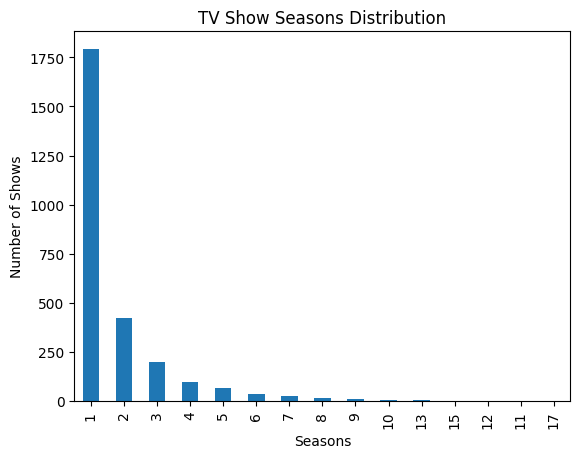

In [11]:
# Split duration into numeric + unit
df[['duration_num', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')

# Convert to numeric
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

# Distribution of Movie lengths
df[df['type']=="Movie"]['duration_num'].plot(kind="hist", bins=30)
plt.title("Distribution of Movie Lengths (minutes)")
plt.xlabel("Minutes")
plt.savefig("movie_length_dist.png")
plt.show()

# Distribution of TV Show seasons
df[df['type']=="TV Show"]['duration_num'].value_counts().plot(kind="bar")
plt.title("TV Show Seasons Distribution")
plt.xlabel("Seasons")
plt.ylabel("Number of Shows")
plt.savefig("tv_show_length_dist.png")
plt.show()

# Genre Analysis

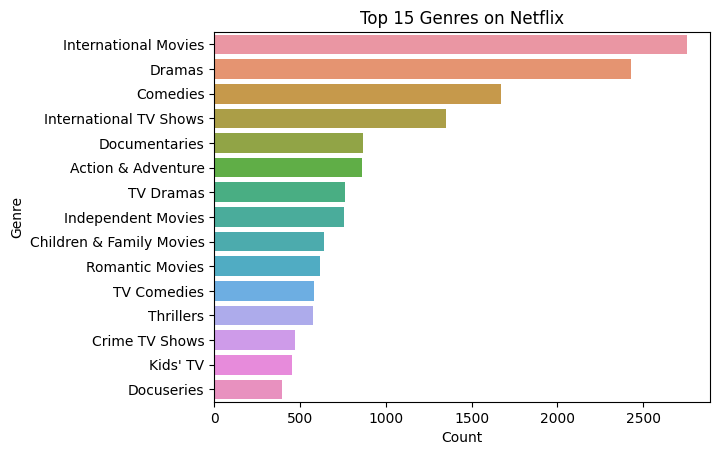

In [12]:
from collections import Counter

# Flatten genre list
genres = df['listed_in'].dropna().str.split(", ")
all_genres = [g for sublist in genres for g in sublist]

# Top 15 genres
genre_counts = Counter(all_genres).most_common(15)
genres_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

sns.barplot(data=genres_df, x="Count", y="Genre")
plt.title("Top 15 Genres on Netflix")
plt.savefig("top_15_genres.png")
plt.show()

# Cast and Directors
**Who appears most often**

/tmp/ipykernel_36/3521975294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].replace("Unknown", pd.NA, inplace=True)


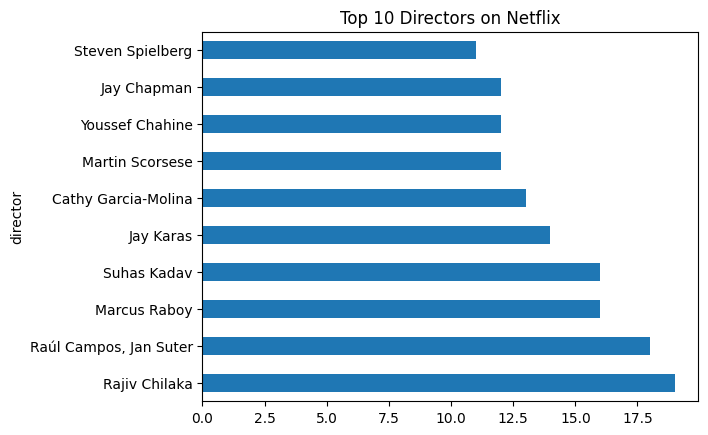

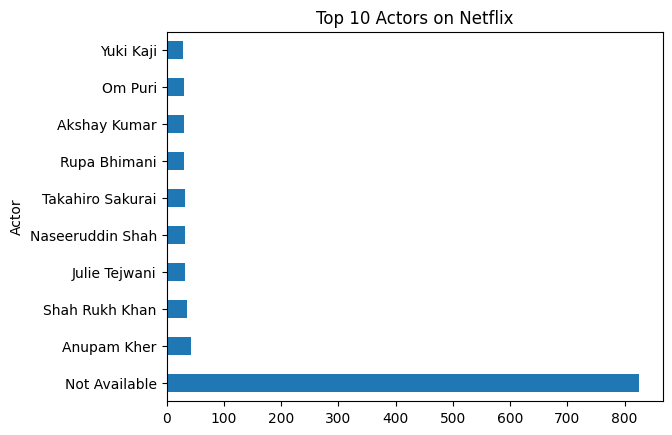

In [13]:
# Top 10 directors
df['director'].replace("Unknown", pd.NA, inplace=True)
df['director'].dropna().value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Directors on Netflix")
plt.savefig("top_10_directors.png")
plt.show()

# Top 10 actors
actors = df['cast'].dropna().str.split(", ")
all_actors = [a.strip() for sublist in actors for a in sublist]
actor_counts = Counter(all_actors).most_common(10)
pd.DataFrame(actor_counts, columns=['Actor', 'Count']).plot(
    kind="barh", x="Actor", y="Count", legend=False, title="Top 10 Actors on Netflix")
plt.savefig("top_10_actors.png")
plt.show()

# Advanced Insights

**Country vs Type**:
do some countries focus on TV vs Movies?

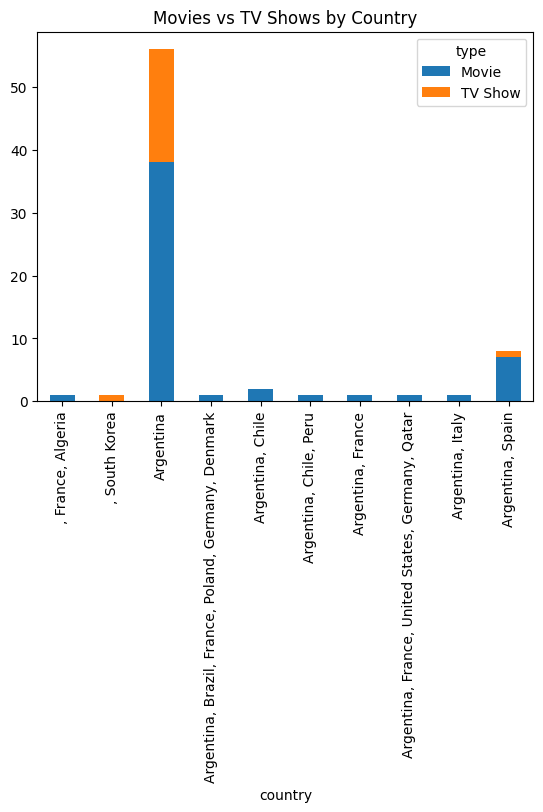

In [14]:
country_type = df.groupby(['country','type']).size().unstack().fillna(0)
country_type.head(10).plot(kind="bar", stacked=True)
plt.title("Movies vs TV Shows by Country")
plt.savefig("movies_v_tv_by_country.png")
plt.show()

**Rating vs Type**

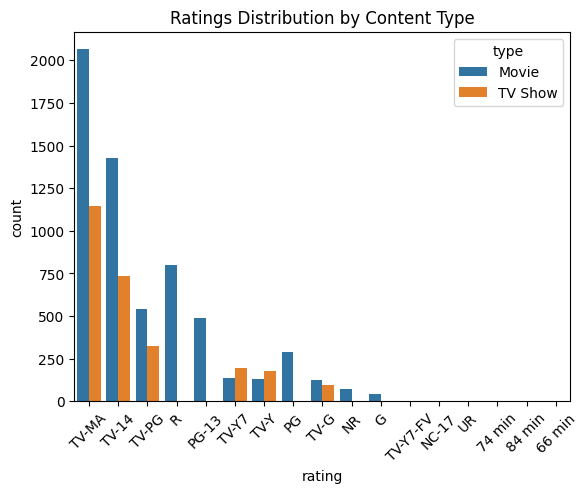

In [15]:
sns.countplot(data=df, x="rating", hue="type", order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Ratings Distribution by Content Type")
plt.savefig("ratings_dist_by_content.png")
plt.show()